# Video Processing of Tree Sway

Joe Ammatelli | Mountain Hydrology Lab, University of Washington | 7-25-22

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import video_pixel_timeseries_analysis as vptsa  # module with custom processing functions

## Set Plotting Backend
Uncomment the below line for interactive plots

In [2]:
%matplotlib notebook

## Set Analysis Parameters

In [3]:
freqmin = 0.3  # lower bound of frequencies to consider, Hz
freqmax = 2    # upper bound of frequencies to consider, Hz

window='boxcar'  # window to apply to time series

# filtering scheme: <reduction operator over spectrum reductions> of <reduction operator over single spectrum>
# Current options: 'mean of max', 'mean of mean', 'median of max'
mask_approach = 'median of max'  

## Option 1: Compute Spectrums

### Specify Path to Video

In [4]:
vid_fn = '../TreeSwayData/snoqualmie_20220208/videos/snoqualmie_1565_120s.mp4'

### Choose Region

Load first frame

In [5]:
vid_capture = cv2.VideoCapture(vid_fn)
print('Open Successful: ', vid_capture.isOpened())
ret, frame = vid_capture.read()
vid_capture.release()

Open Successful:  True


Draw bounding box around region of interest to determine pixel coordinates

<IPython.core.display.Javascript object>


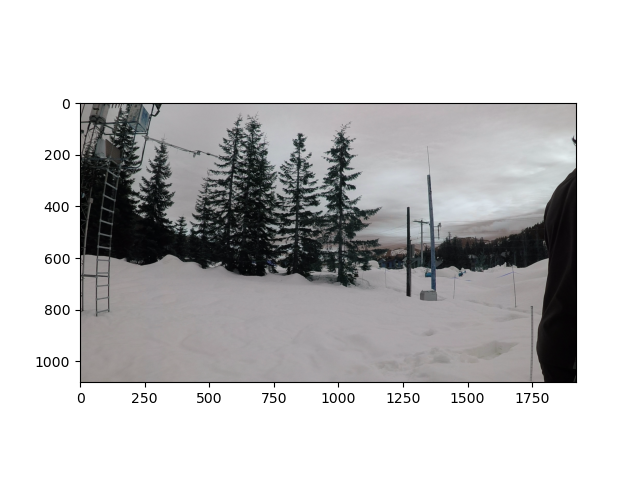

In [6]:
plt.figure()
plt.imshow(frame)

Set `ymin`, `ymax`, `xmin`, `xmax` using the coordinates determined above; verify correct region is displayed

<IPython.core.display.Javascript object>


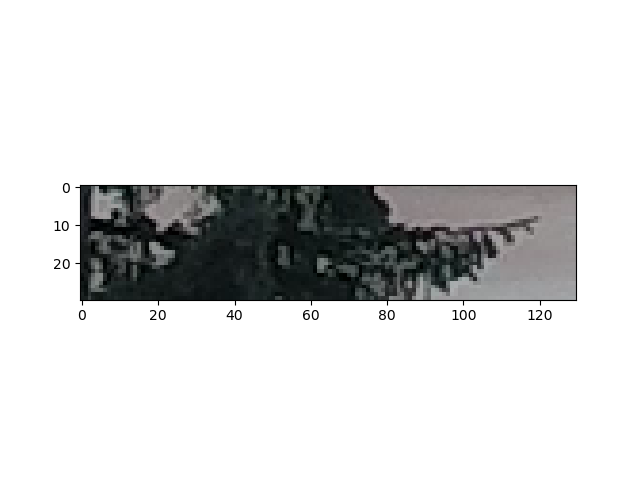

In [7]:
ymin = 455
ymax = 485
xmin = 1010
xmax = 1140

region = [ymin, ymax, xmin, xmax]

plt.figure()
plt.imshow(frame[region[0]:region[1], region[2]:region[3]])

### Read Video Region into Array

In [8]:
vid, fps = vptsa.readvid_vreader(vid_fn, region=region)

Reading video into array
2877

Finished reading video


### Compute Spectrums

In [9]:
%%time
freq, pxx = vptsa.get_pixel_spectrums(vid, fps, freqmin, freqmax, window=window, conserve_mem=True)

Computing pixel spectrums
(2049, 30, 130)
Computing spectrums for row:
29
Finished computing spectrums
CPU times: user 199 ms, sys: 32.5 ms, total: 231 ms
Wall time: 226 ms


## Option 2: Load Existing Spectrums

In [ ]:
input_prefix = ''

# load frequency array
freq = np.load(f'{input_prefix}_freq')

# load power array
pxx = np.load(f'{input_prefix}_pxx')

## Get Spectrum Peaks and Apply Filter to Remove Noise

In [11]:
%%time
peak_freq = vptsa.get_peak_freqs(freq, pxx)
peak_freq_masked = vptsa.mask_peak_freq(mask_approach, peak_freq, pxx)

CPU times: user 13.6 ms, sys: 14.3 ms, total: 27.9 ms
Wall time: 25.2 ms


## Plot Output

<IPython.core.display.Javascript object>


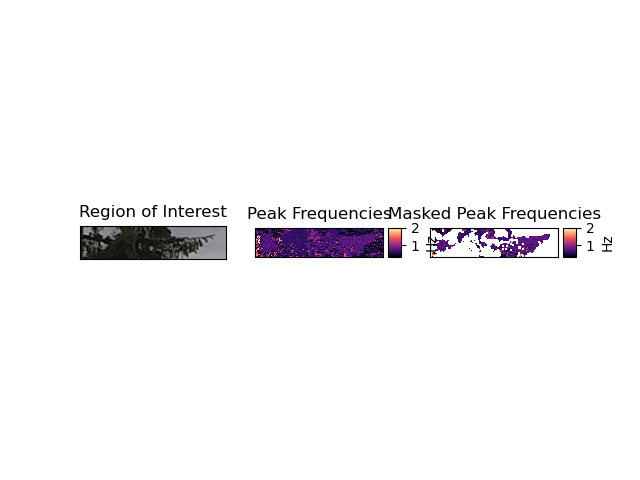

In [11]:
vptsa.plot_vid_region(vid, peak_freq, peak_freq_masked, freqmin, freqmax, figsize=None)

## Regional Statistics

In [12]:
%%time
stats_df = vptsa.get_freq_specs(peak_freq, peak_freq_masked)
display(stats_df)

,mean,median,mode
umasked,0.672223,0.649741,0.597059
masked,0.705923,0.696569,0.597059


CPU times: user 17 ms, sys: 9.4 ms, total: 26.4 ms
Wall time: 26.5 ms


## Save Dataset

In [41]:
output_prefix = ''

np.save(f'{output_prefix}_freq', freq)
np.save(f'{output_prefix}_pxx', pxx)